Case Study 1: L1 and L2 Regression Methods

Prepared by: Joshua Hudson

Note: The following resources were used throughout this notebook:
1. Unit 1 and 2 Code provided by Dr. Slater (Basis)
2. Async Code from Unit 1 and 2 (Basis)
2. Sklearn, Scipy, Matplotlib libraries (Syntax/common procedures)
3. CoPilot Assistant Built into VSCode (Syntax/common procedures)



In [31]:
#load in the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [32]:
# load in the data
data = pd.read_csv('train.csv')

#perform initial data exploration
print(data.head())
print(data.info())
print(data.describe())
print('number of null values:', data.isnull().sum().sum())




   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4     88.9444675000         57.8626922857   
1                   5     92.7292140000         58.5184161429   
2                   4     88.9444675000         57.8852418571   
3                   4     88.9444675000         57.8739670714   
4                   4     88.9444675000         57.8401427143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0      66.3615924316          36.1166119054         1.1817952393   
1      73.1327872225          36.3966020292         1.4493091934   
2      66.3615924316          36.1225090360         1.1817952393   
3      66.3615924316          36.1195603503         1.1817952393   
4      66.3615924316          36.1107157375         1.1817952393   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0             1.0623955452     122.9060700000          31.7949208571   
1             1.0577551227     122.9060700000          3

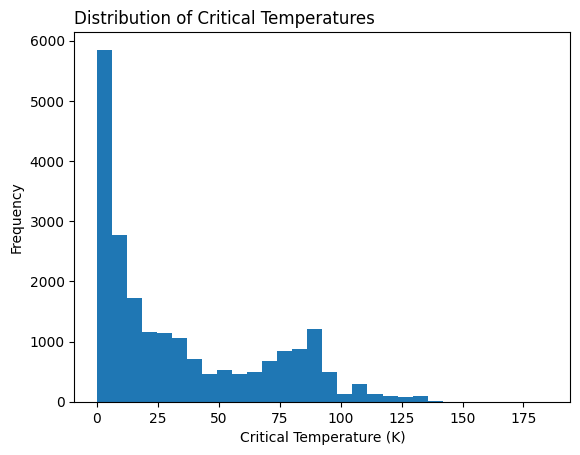

Shapiro-Wilk P-value on Critical Temperature: 0.000


c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21263.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# Visualize the distribution of the target variable with a histogram and axis labels
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.title('Distribution of Critical Temperatures', loc='left')
plt.hist(data['critical_temp'], bins=30)
plt.show()

#perform normality test from scipy
from scipy.stats import shapiro
p_value = shapiro(data['critical_temp']).pvalue
print(f"Shapiro-Wilk P-value on Critical Temperature: {p_value:.3f}")

In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scale = StandardScaler()

#split the data into features and target variable
X = data.drop('critical_temp', axis=1)
y = data['critical_temp']

scaled_data = pd.DataFrame(scale.fit_transform(X), columns=X.columns) #scale the features (not the target variable)

Average RMSE for All Folds for the Least Squares Regression: 17.614395906540274
R^2 for Least Squares Regression: 0.7353866779017402


Text(0.0, 1.0, 'Least Squares Regression')

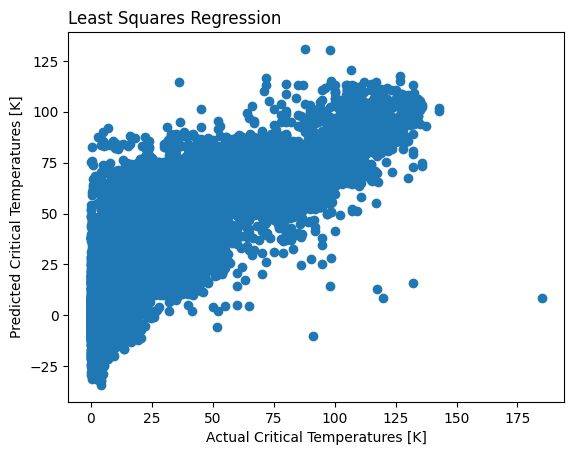

In [35]:
#Performing least squares regression with 1-fold cross validation as a base model
#the following code was repurposed from the code that professor Slater provided in unit 2
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
splits = KFold(n_splits=15, shuffle=True, random_state=1)
scores = cross_val_score(model, scaled_data, y, cv=splits, scoring="neg_mean_squared_error")
preds = cross_val_predict(model,  scaled_data, y, cv=splits)

#calculate the RMSE
rmse = np.sqrt(-scores)
print(f"Average RMSE for All Folds for the Least Squares Regression: {rmse.mean()}")

#calculate R^2
from sklearn.metrics import r2_score
r2 = r2_score(y, preds)
print(f"R^2 for Least Squares Regression: {r2}")

#Plot the least squares regression results using Professor Slater's code as a base
import matplotlib.pyplot as plt
plt.scatter(y, preds)
plt.xlabel("Actual Critical Temperatures [K]")
plt.ylabel("Predicted Critical Temperatures [K]")
plt.title("Least Squares Regression", loc='left')



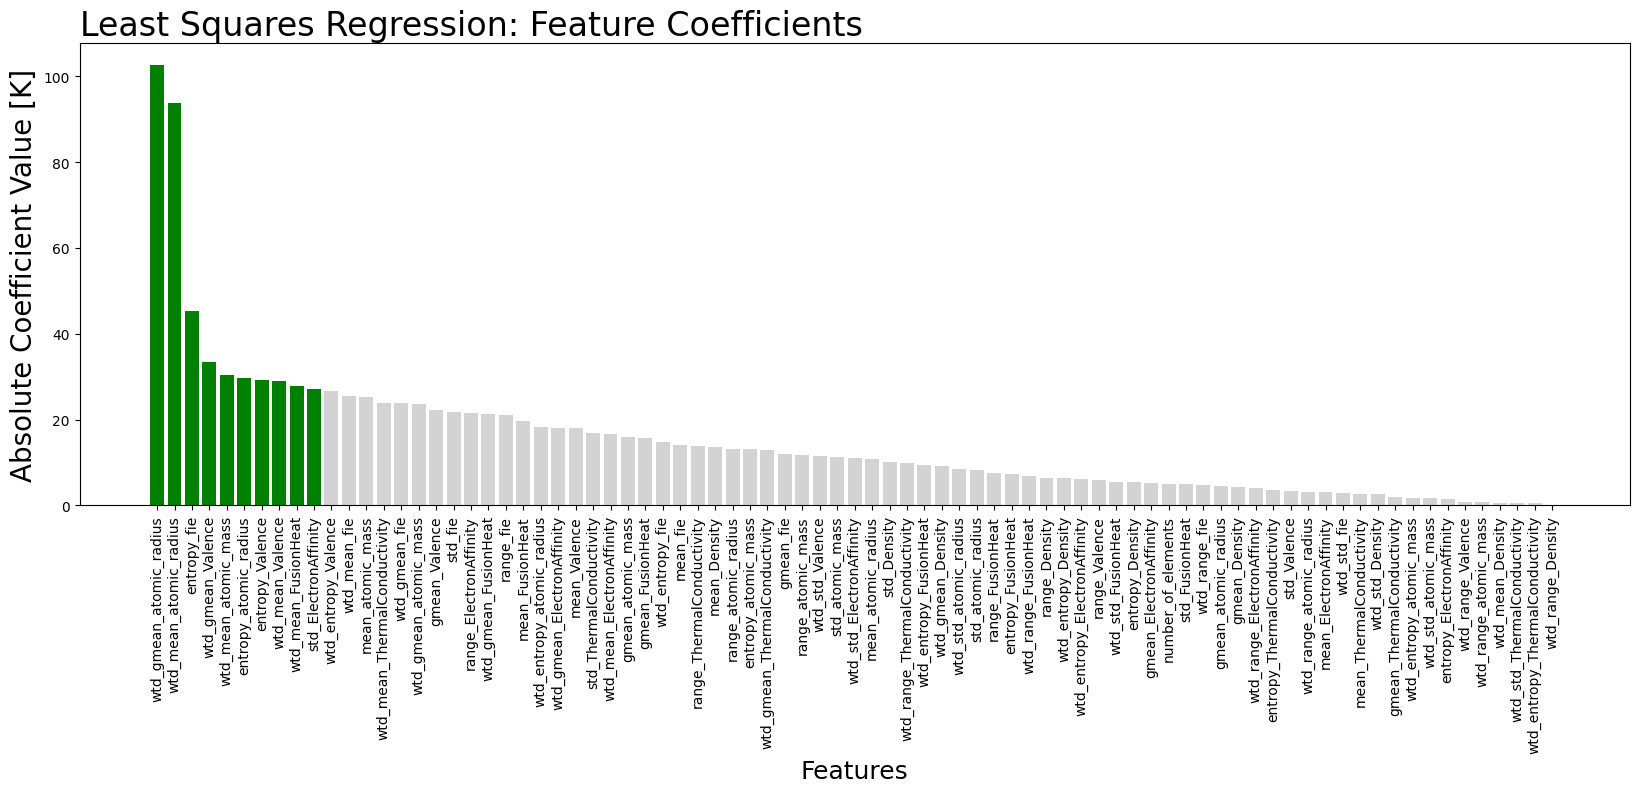

wtd_gmean_atomic_radius   102.5817906902
wtd_mean_atomic_radius     93.7995692013
entropy_fie                45.3341145365
wtd_gmean_Valence          33.3605976454
wtd_mean_atomic_mass       30.2769576981
entropy_atomic_radius      29.7755000921
entropy_Valence            29.2540413436
wtd_mean_Valence           29.0980756759
wtd_mean_FusionHeat        27.7409684403
std_ElectronAffinity       27.0280127453
dtype: float64
gmean_ThermalConductivity         2.0271912668
wtd_entropy_atomic_mass           1.8282488565
wtd_std_atomic_mass               1.8080795830
entropy_ElectronAffinity          1.5407801716
wtd_range_Valence                 0.7655960044
wtd_range_atomic_mass             0.7007059423
wtd_mean_Density                  0.5358582361
wtd_std_ThermalConductivity       0.5089125814
wtd_entropy_ThermalConductivity   0.4719307707
wtd_range_Density                 0.1247580956
dtype: float64


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scaled_data, y)

#Plot the LSE regression results
coef = model.coef_
feature_names = scaled_data.columns

# Create a Series of absolute coefficients
importance = pd.Series(np.abs(coef), index=feature_names)

#plot the coefficients of the LSE model in order of magnitude with the top ten bars green and the bottom ten bars lightgrey
plt.figure(figsize=(20,6))
plt.bar(importance.sort_values(ascending=False).index, importance.sort_values(ascending=False), color=['green' if i < 10 else 'lightgrey' for i in range(len(importance))])
plt.xticks(rotation=90)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Absolute Coefficient Value [K]", fontsize=20)
plt.title("Least Squares Regression: Feature Coefficients", fontsize=24, loc='left')
plt.show()

# Get the top 10
top10 = importance.sort_values(ascending=False).head(10)
print(top10)

# Get the bottom 10
bottom10 = importance.sort_values(ascending=False).tail(10)
print(bottom10)


In [37]:
#Performing L1 Regression with 15-fold cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV

splits = KFold(n_splits=15, shuffle=True, random_state=1)

L1_Model = LassoCV(alphas=np.logspace(-10,10,30),cv=splits)
L1_Model.fit(scaled_data,y)

mean_rmse = np.sqrt(L1_Model.mse_path_.mean(axis=1))


c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.181e+05, tolerance: 2.327e+03
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.905e+06, tolerance: 2.327e+03
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the feat

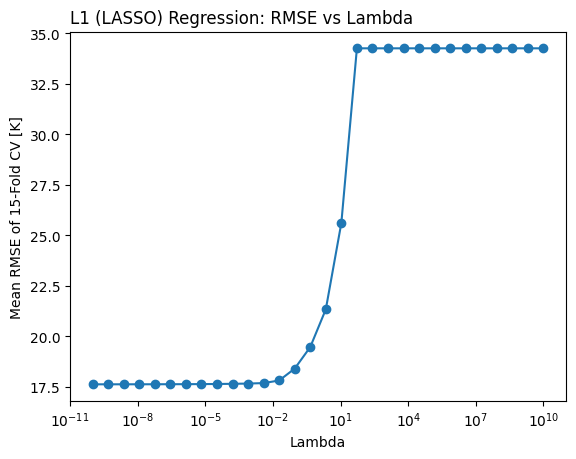

Lambda: 10000000000.0000000000, Mean RMSE: 34.2561
Lambda: 2043359717.8569395542, Mean RMSE: 34.2561
Lambda: 417531893.6560425758, Mean RMSE: 34.2561
Lambda: 85316785.2417284846, Mean RMSE: 34.2561
Lambda: 17433288.2219999433, Mean RMSE: 34.2561
Lambda: 3562247.8902624515, Mean RMSE: 34.2561
Lambda: 727895.3843983161, Mean RMSE: 34.2561
Lambda: 148735.2107293512, Mean RMSE: 34.2561
Lambda: 30391.9538231321, Mean RMSE: 34.2561
Lambda: 6210.1694189156, Mean RMSE: 34.2561
Lambda: 1268.9610031679, Mean RMSE: 34.2561
Lambda: 259.2943797405, Mean RMSE: 34.2561
Lambda: 52.9831690628, Mean RMSE: 34.2561
Lambda: 10.8263673387, Mean RMSE: 25.6103
Lambda: 2.2122162911, Mean RMSE: 21.3331
Lambda: 0.4520353656, Mean RMSE: 19.4669
Lambda: 0.0923670857, Mean RMSE: 18.3997
Lambda: 0.0188739182, Mean RMSE: 17.8114
Lambda: 0.0038566204, Mean RMSE: 17.6830
Lambda: 0.0007880463, Mean RMSE: 17.6593
Lambda: 0.0001610262, Mean RMSE: 17.6468
Lambda: 0.0000329034, Mean RMSE: 17.6384
Lambda: 0.0000067234, Mean 

In [38]:
#Plot the LASSOCV results
plt.plot(L1_Model.alphas_, mean_rmse, marker='o')
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Mean RMSE of 15-Fold CV [K]")
plt.title("L1 (LASSO) Regression: RMSE vs Lambda", loc='left')
plt.show()

#print all lambda values and their corresponding RMSE not in scientific notation
for alpha, rmse in zip(L1_Model.alphas_, mean_rmse):
    print(f"Lambda: {alpha:.10f}, Mean RMSE: {rmse:.4f}")


In [39]:
#select alpha manually based on the plot
best_alpha = 0.018
L1_final_model = Lasso(alpha=best_alpha)
L1_final_model.fit(scaled_data, y)
L1_preds = cross_val_predict(L1_final_model, scaled_data, y, cv=splits)
L1_r2 = r2_score(y, L1_preds)
L1_scores = cross_val_score(L1_final_model, scaled_data, y, cv=splits, scoring="neg_mean_squared_error")
L1_rmse = np.sqrt(-L1_scores)
print(f"Average RMSE for All Folds for the L1 Regression: {L1_rmse.mean()}")
print(f"R^2 for L1 Regression: {L1_r2}")

c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.773e+05, tolerance: 2.495e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.225e+05, tolerance: 2.327e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Average RMSE for All Folds for the L1 Regression: 17.79705620093404
R^2 for L1 Regression: 0.7298821593649689


c:\Users\josht\anaconda3\envs\MachineLearningI\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.233e+05, tolerance: 2.328e+03
  model = cd_fast.enet_coordinate_descent(


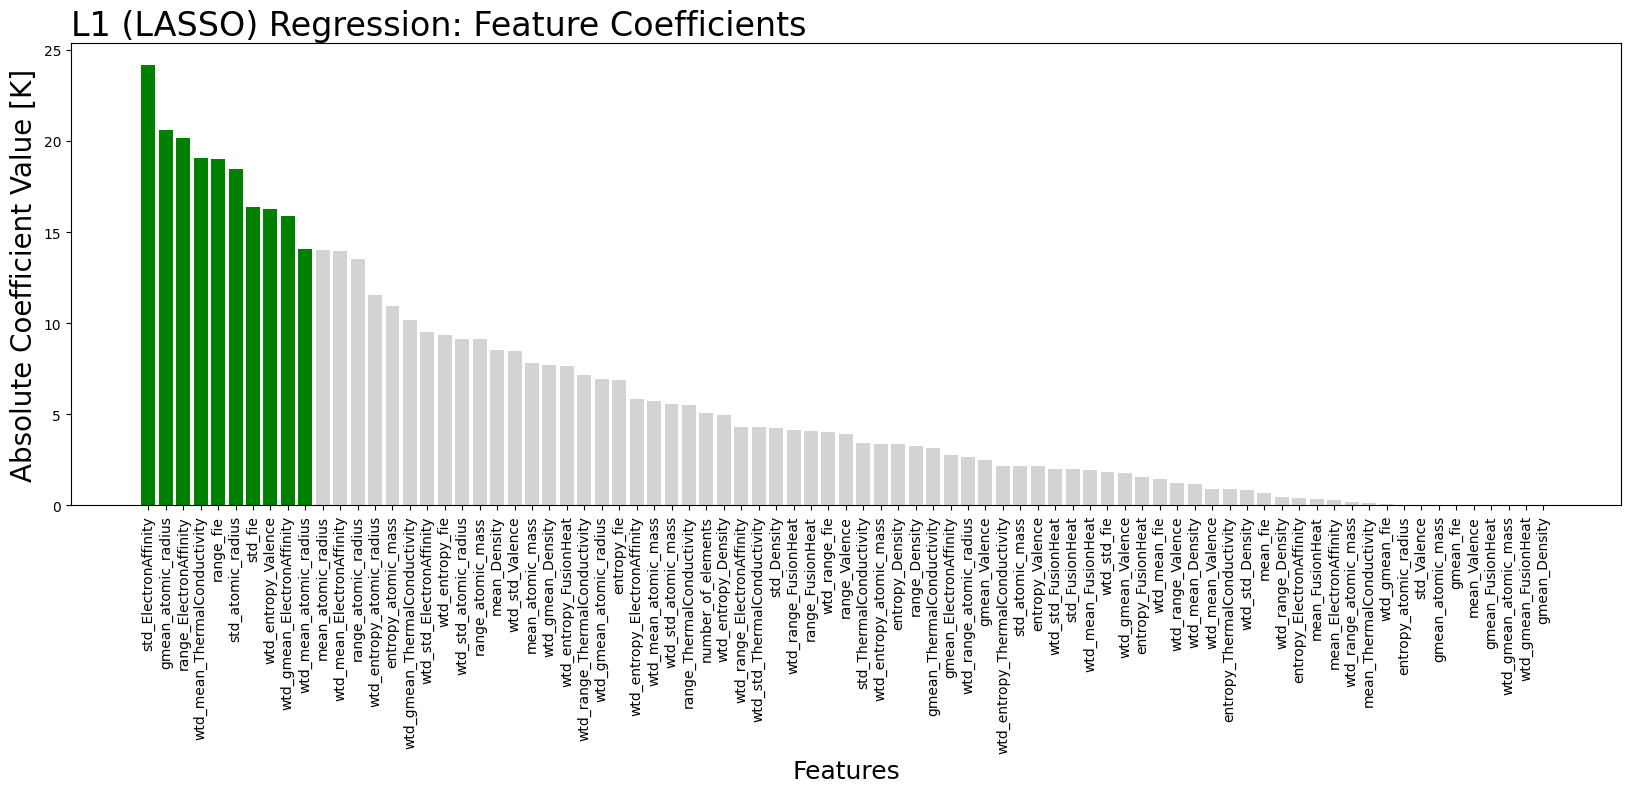

std_ElectronAffinity           24.1496245807
gmean_atomic_radius            20.6125195473
range_ElectronAffinity         20.1868805656
wtd_mean_ThermalConductivity   19.0690267134
range_fie                      19.0126297294
std_atomic_radius              18.4364694998
std_fie                        16.3485568898
wtd_entropy_Valence            16.2645706262
wtd_gmean_ElectronAffinity     15.8573778621
wtd_mean_atomic_radius         14.0826919118
dtype: float64
wtd_gmean_fie           0.0798784324
entropy_atomic_radius   0.0000000000
std_Valence             0.0000000000
gmean_atomic_mass       0.0000000000
gmean_fie               0.0000000000
mean_Valence            0.0000000000
gmean_FusionHeat        0.0000000000
wtd_gmean_atomic_mass   0.0000000000
wtd_gmean_FusionHeat    0.0000000000
gmean_Density           0.0000000000
dtype: float64


In [40]:
#Plot the L1 regression results
coef = L1_final_model.coef_
feature_names = scaled_data.columns

# Create a Series of absolute coefficients
importance = pd.Series(np.abs(coef), index=feature_names)

#plot the coefficients of the L1 model in order of magnitude with the top ten bars green and the bottom ten bars lightgrey
plt.figure(figsize=(20,6))
plt.bar(importance.sort_values(ascending=False).index, importance.sort_values(ascending=False), color=['green' if i < 10 else 'lightgrey' for i in range(len(importance))])
plt.xticks(rotation=90)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Absolute Coefficient Value [K]", fontsize=20)
plt.title("L1 (LASSO) Regression: Feature Coefficients", fontsize=24, loc='left')
plt.show()

# Get the top 10
top10 = importance.sort_values(ascending=False).head(10)
print(top10)

# Get the bottom 10
bottom10 = importance.sort_values(ascending=False).tail(10)
print(bottom10)


In [41]:
#Peforming Ridge Regression with 15-fold cross validation
from sklearn.linear_model import Ridge


lambdas = np.logspace(-10,10,30)
L2_model = Ridge()
i=0
rmse = []  
plot_rmse = []

for value in lambdas:
    L2_model.alpha = value
    scores = cross_val_score(L2_model, scaled_data, y, cv=splits, scoring="neg_mean_squared_error")
    #store the RMSE and corresponding lambda value for later plotting
    rmse.append(np.sqrt(-scores.mean()))
    plot_rmse.append((rmse[i], lambdas[i]))
    i=i+1
    


            RMSE                 Lambda
0  17.6201803183           0.0000000001
1  17.6201803183           0.0000000005
2  17.6201803183           0.0000000024
3  17.6201803183           0.0000000117
4  17.6201803182           0.0000000574
5  17.6201803175           0.0000002807
6  17.6201803145           0.0000013738
7  17.6201802997           0.0000067234
8  17.6201802274           0.0000329034
9  17.6201798739           0.0001610262
10 17.6201781580           0.0007880463
11 17.6201700932           0.0038566204
12 17.6201383647           0.0188739182
13 17.6201442744           0.0923670857
14 17.6223050619           0.4520353656
15 17.6386991928           2.2122162911
16 17.6865714094          10.8263673387
17 17.8504550721          52.9831690628
18 18.2679397004         259.2943797405
19 18.8941416868        1268.9610031679
20 20.0110743811        6210.1694189156
21 21.5859118262       30391.9538231321
22 23.7440583946      148735.2107293512
23 27.7347051712      727895.3843983161


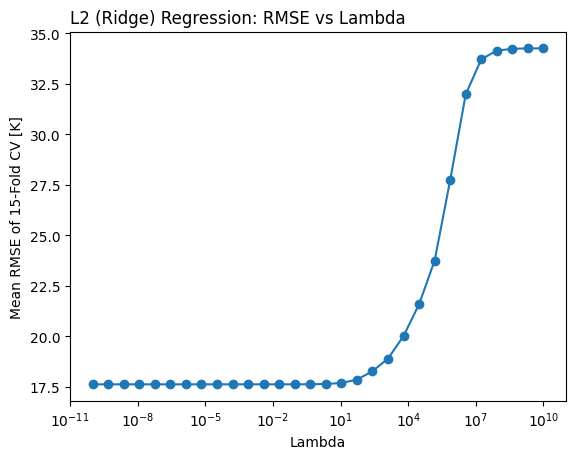

In [42]:
#convert plot_rmse to a dataframe with no scientific notation
plot_rmse = pd.DataFrame(plot_rmse, columns=['RMSE', 'Lambda'])
pd.options.display.float_format = '{:.10f}'.format
print(plot_rmse)
#plot the plot_rmse values
plt.plot(lambdas, rmse, marker='o')
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Mean RMSE of 15-Fold CV [K]")
plt.title("L2 (Ridge) Regression: RMSE vs Lambda", loc='left')
plt.show()

Average RMSE for All Folds for the L2 Regression: 17.61660648738904
R^2 for L2 Regression: 0.7353228867033401


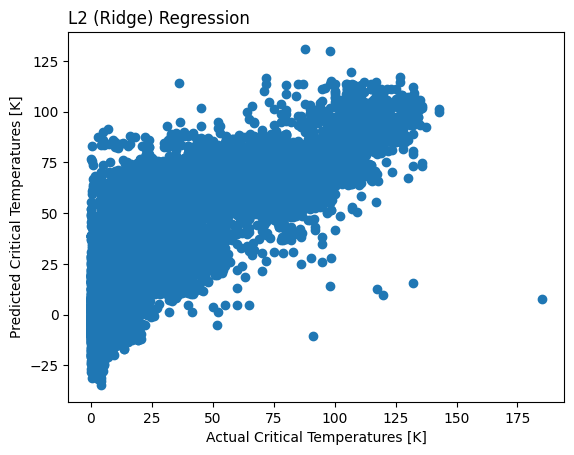

In [43]:
#select alpha manually based on the plot
best_alpha = 0.452
L2_final_model = Ridge(alpha=best_alpha)
L2_final_model.fit(scaled_data, y)
L2_preds = cross_val_predict(L2_final_model, scaled_data, y, cv=splits)
L2_r2 = r2_score(y, L2_preds)
L2_scores = cross_val_score(L2_final_model, scaled_data, y, cv=splits, scoring="neg_mean_squared_error")
L2_rmse = np.sqrt(-L2_scores)
print(f"Average RMSE for All Folds for the L2 Regression: {L2_rmse.mean()}")
print(f"R^2 for L2 Regression: {L2_r2}")

#plot the L2 predicts vs actuals with line
plt.scatter(y, L2_preds)
plt.xlabel("Actual Critical Temperatures [K]")
plt.ylabel("Predicted Critical Temperatures [K]")
plt.title("L2 (Ridge) Regression", loc='left')
plt.show()


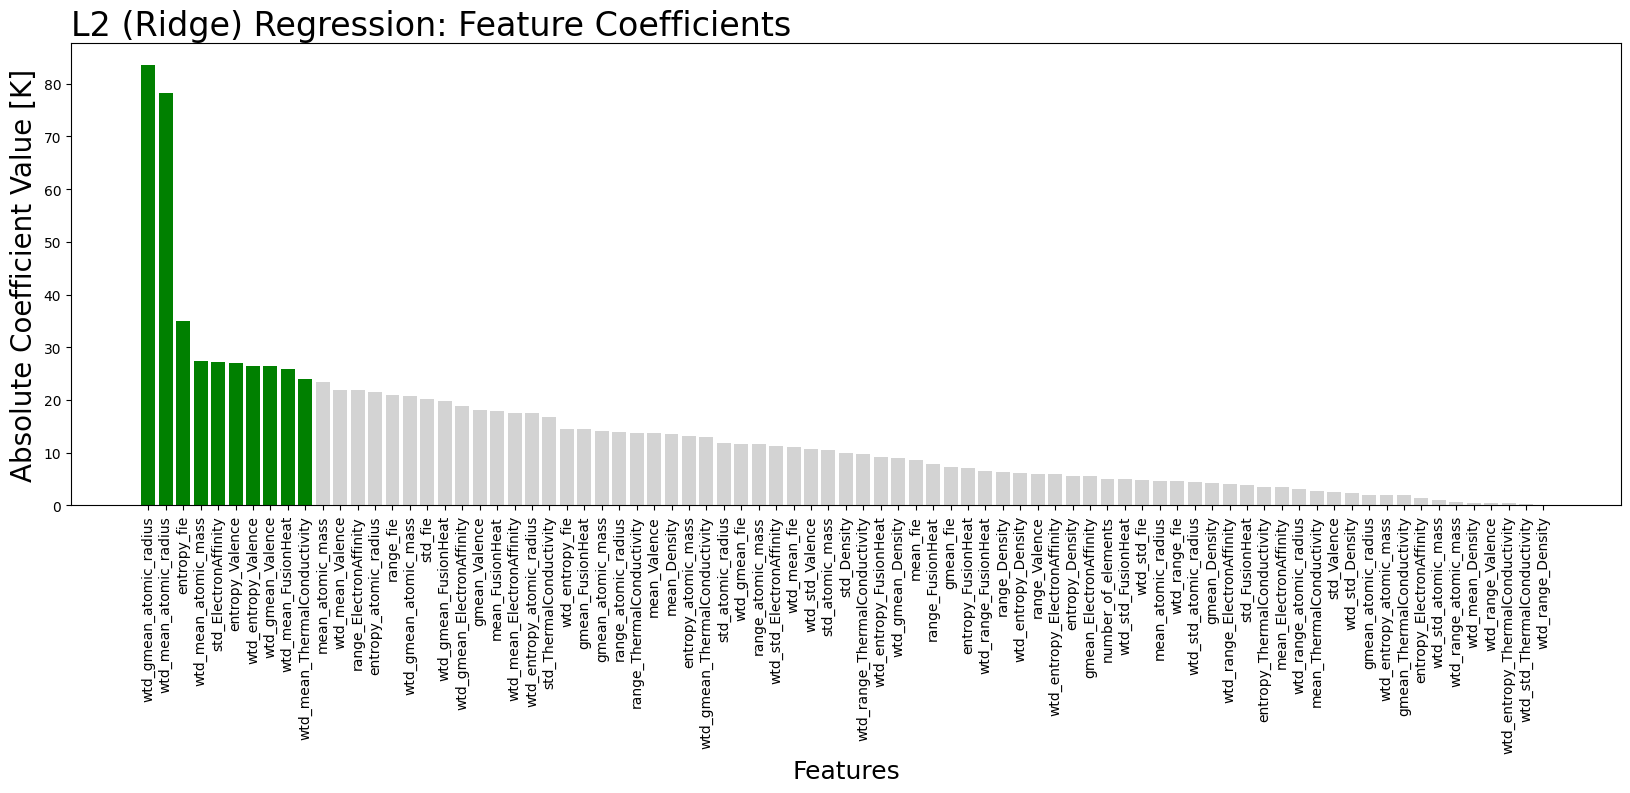

wtd_gmean_atomic_radius        83.4823783232
wtd_mean_atomic_radius         78.2334149890
entropy_fie                    35.0464349958
wtd_mean_atomic_mass           27.3109871142
std_ElectronAffinity           27.2851436846
entropy_Valence                27.0161225491
wtd_entropy_Valence            26.4460130517
wtd_gmean_Valence              26.4428991739
wtd_mean_FusionHeat            25.8267707312
wtd_mean_ThermalConductivity   23.9255780778
dtype: float64
wtd_entropy_atomic_mass           1.9881086988
gmean_ThermalConductivity         1.9690614115
entropy_ElectronAffinity          1.3713581810
wtd_std_atomic_mass               0.9223837524
wtd_range_atomic_mass             0.6358966761
wtd_mean_Density                  0.5311197997
wtd_range_Valence                 0.5116889865
wtd_entropy_ThermalConductivity   0.5079886348
wtd_std_ThermalConductivity       0.3229467999
wtd_range_Density                 0.0671777321
dtype: float64


In [44]:
#Plot the L2 regression results
coef = L2_final_model.coef_
feature_names = scaled_data.columns

# Create a Series of absolute coefficients
importance = pd.Series(np.abs(coef), index=feature_names)

#plot the coefficients of the L2 model in order of magnitude with the top ten bars green and the bottom ten bars lightgrey
plt.figure(figsize=(20,6))
plt.bar(importance.sort_values(ascending=False).index, importance.sort_values(ascending=False), color=['green' if i < 10 else 'lightgrey' for i in range(len(importance))])
plt.xticks(rotation=90)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Absolute Coefficient Value [K]", fontsize=20)
plt.title("L2 (Ridge) Regression: Feature Coefficients", fontsize=24, loc='left')
plt.show()

# Get the top 10
top10 = importance.sort_values(ascending=False).head(10)
print(top10)

# Get the bottom 10
bottom10 = importance.sort_values(ascending=False).tail(10)
print(bottom10)